# Classification Project with Keras

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**load data**

In [3]:
df = pd.read_csv("../COURSE_NOTEBOOKS/DATA/cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**show data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**analysis**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

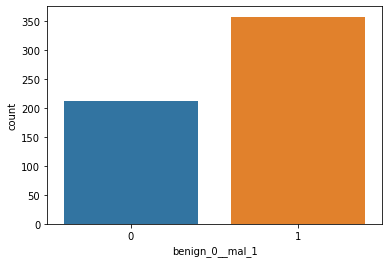

In [10]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

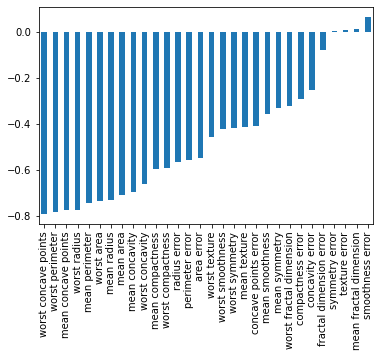

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

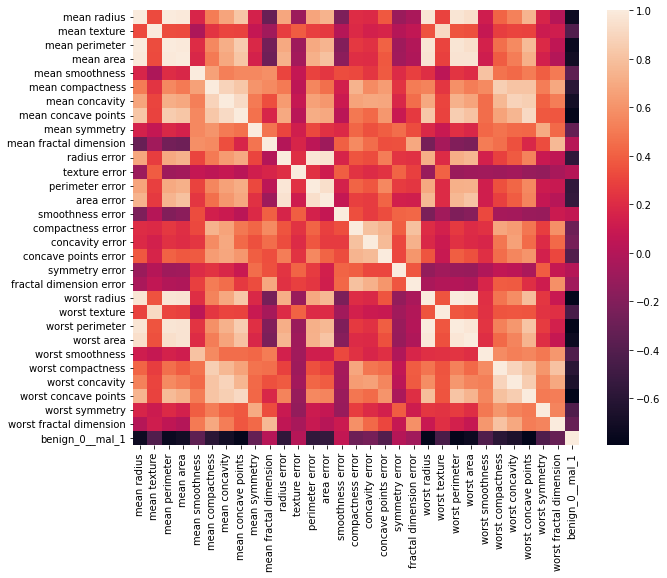

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

**splitting**

In [45]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=101)

**normalizing**

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [48]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**creating model**

In [49]:
X_train.shape

(544, 30)

In [58]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

**training model**

In [59]:
model.fit(x=X_train, y=y_train, 
            epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
17/17 [==============================] - 0s 7ms/step - loss: 0.6884 - val_loss: 0.6482
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6462 - val_loss: 0.6103
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5959 - val_loss: 0.5578
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5241 - val_loss: 0.4961
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4436 - val_loss: 0.4220
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3753 - val_loss: 0.3665
Epoch 7/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3227 - val_loss: 0.3216
Epoch 8/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2831 - val_loss: 0.3000
Epoch 9/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2550 - val_loss: 0.2502
Epoch 10/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2308 - val_loss: 0.2628
Epoch 11/

**evaluate model**

<AxesSubplot:>

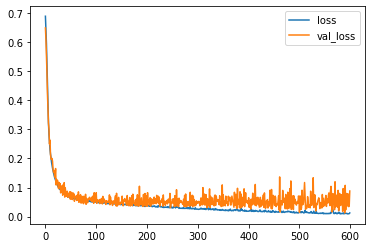

In [60]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

**new try**

In [53]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# help(EarlyStopping)

In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [55]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
            callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 0s 7ms/step - loss: 0.6715 - val_loss: 0.6736
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6383 - val_loss: 0.6490
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6042 - val_loss: 0.6190
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5573 - val_loss: 0.5804
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5018 - val_loss: 0.5315
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4482 - val_loss: 0.4841
Epoch 7/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.4291
Epoch 8/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3479 - val_loss: 0.3918
Epoch 9/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3049 - val_loss: 0.3356
Epoch 10/600
17/17 [==============================] - 0s 2ms/step - loss: 0.2686 - val_loss: 0.3234
Epoch 11/

**evaluation**

<AxesSubplot:>

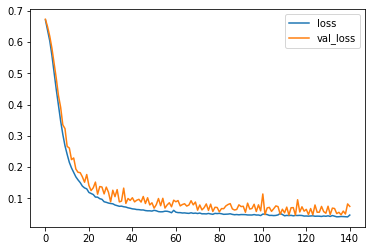

In [56]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

**second alternative to prevent overfitting**

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [63]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
17/17 [==============================] - 0s 7ms/step - loss: 0.6846 - val_loss: 0.6792
Epoch 2/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6477 - val_loss: 0.6311
Epoch 3/600
17/17 [==============================] - 0s 2ms/step - loss: 0.6260 - val_loss: 0.5767
Epoch 4/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - val_loss: 0.5263
Epoch 5/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5438 - val_loss: 0.4854
Epoch 6/600
17/17 [==============================] - 0s 2ms/step - loss: 0.5176 - val_loss: 0.4467
Epoch 7/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4681 - val_loss: 0.4105
Epoch 8/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4162 - val_loss: 0.3787
Epoch 9/600
17/17 [==============================] - 0s 2ms/step - loss: 0.4057 - val_loss: 0.3551
Epoch 10/600
17/17 [==============================] - 0s 2ms/step - loss: 0.3822 - val_loss: 0.3297
Epoch 11/

**evaluation**

<AxesSubplot:>

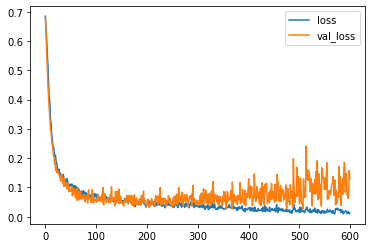

In [64]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

**final evaluation**

In [76]:
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 12ms/step


array([[1.8759835e-34],
       [1.6197583e-03],
       [5.8970762e-10],
       [1.0000000e+00],
       [9.9999636e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [1.0000000e+00],
       [9.1142130e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.4360393e-01],
       [3.4174150e-25],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9906361e-01],
       [1.0000000e+00],
       [7.6416948e-14],
       [1.0000000e+00],
       [2.4115700e-01]], dtype=float32)

In [77]:
#prediction_classes = np.argmax(predictions, axis=-1)
#prediction_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [85]:
#prediction_classes = np.where(predictions >= 0.5, 1, 0).reshape(1,-1).reshape(1,-1)
#prediction_classes

array([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0]])

In [94]:
prediction_classes = predictions.copy()
prediction_classes[prediction_classes >= 0.5] = 1
prediction_classes[prediction_classes < 0.5] = 0
#prediction_classes.reshape(1, -1)
prediction_classes = prediction_classes.astype('int')
prediction_classes

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [95]:
classification_report(y_test, prediction_classes)

'              precision    recall  f1-score   support\n\n           0       1.00      0.86      0.92         7\n           1       0.95      1.00      0.97        18\n\n    accuracy                           0.96        25\n   macro avg       0.97      0.93      0.95        25\nweighted avg       0.96      0.96      0.96        25\n'

In [96]:
confusion_matrix(y_test, prediction_classes)

array([[ 6,  1],
       [ 0, 18]], dtype=int64)

In [97]:
accuracy_score(y_test, prediction_classes)

0.96